In [10]:
import pandas as pd
from ultralytics import YOLO
import torch
from torch import device
import matplotlib.pyplot as plt
from PIL import Image
from tqdm.notebook import tqdm
%matplotlib inline

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [12]:
model = YOLO('yolov8n.pt')

In [13]:
data = pd.DataFrame({'file': []})
path = ''

In [14]:
def is_anomaly(filename: str) -> bool:
    im = Image.open(filename).resize((256, 256))
    img = Image.new(im.mode, size=(512, 512))
    img.paste(im, (128, 128))
    empty = True
    state = False
    for angle in range(0, 360, 90):
        result = model.predict(img.rotate(angle), device=device)[0].boxes
        for cls, conf in zip(result.cls.cpu().numpy(), result.conf.cpu().numpy()):
            if 13 < cls < 24:  #animals
                state = True
            elif conf > 0.5:
                empty = False
    return not (empty or state)

In [15]:
mask = [is_anomaly(f'{filename}') for filename in tqdm(data['file'])]

0it [00:00, ?it/s]

In [16]:
anomalies = data[mask]

IndexError: index 0 is out of bounds for axis 0 with size 0

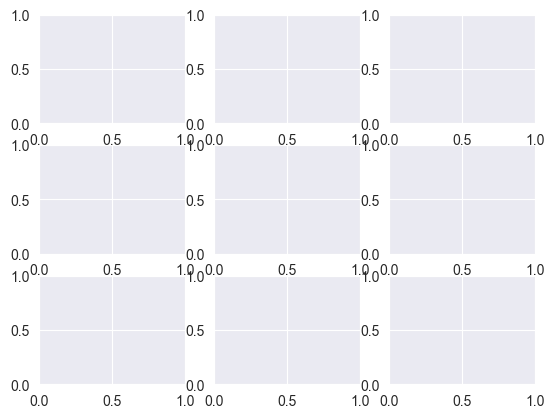

In [17]:
for k in range(3):
    fig, ax = plt.subplots(3, 3)
    for i in range(9 * k, 9 * (k + 1)):
        ax[i % 9 // 3, i % 9 % 3].imshow(Image.open(f'{anomalies.iloc[i, 0]}'))